In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns={'RowNumber', 'CustomerId', 'Surname'}, inplace=True)

In [4]:
#Lets Define our dependent and Independent Variable
X= df.iloc[:, 0:10] # Dependent variable
y= df.iloc[:, 10]   #Independent Variable

In [5]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [6]:
# y.columns

In [7]:
#Check the dataType of each columns
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [8]:
# 2 Categorical Columns are there Geography and Gender
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
geography=pd.get_dummies(df['Geography'], drop_first=True, dtype='int') #Convert it into 1s and 0s
gender = pd.get_dummies(df['Gender'], drop_first = True, dtype='int')

In [10]:
X.drop(columns=['Geography', 'Gender'], inplace=True)
X = pd.concat([X, geography, gender], axis=1)

#### Train Test Split

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size = 0.2, random_state=0, stratify=y)

In [40]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,650.683000,38.858625,4.978625,76847.804460,1.526000,0.70600,0.518875,100358.377338,0.250500,0.24850,0.546000
std,96.507674,10.440175,2.886210,62253.337409,0.582552,0.45562,0.499675,57676.075102,0.433328,0.43217,0.497911
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.00000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51014.837500,0.000000,0.00000,0.000000
50%,652.000000,37.000000,5.000000,97466.985000,1.000000,1.00000,1.000000,100608.435000,0.000000,0.00000,1.000000
75%,718.000000,44.000000,7.000000,127842.597500,2.000000,1.00000,1.000000,149552.920000,1.000000,0.00000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.00000,1.000000


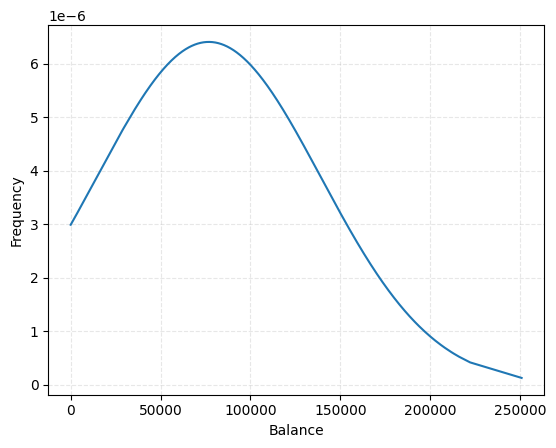

In [41]:
import scipy.stats as stats
df_mean = np.mean(X_train['Balance'])
df_std = np.std(X_train['Balance'])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(X_train["Balance"].sort_values(), df_mean, df_std)
# Drawing a graph
plt.plot(X_train["Balance"].sort_values(), pdf)
# plt.xlim([30,70])  
plt.xlabel("Balance")    
plt.ylabel("Frequency")                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

"**What is the difference between fit(), transform() and fit_transform()**"<br>
     - The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling. <br>
     - The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.<br>
     - The fit_transform() method does both fits and transform.

In [28]:
stdscaler = StandardScaler()
# stdscaler.fit_transform(X)

In [29]:
# stdscaler.fit(X)

In [55]:
# stdscaler.transform(X)

In [56]:
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [58]:
tf.__version__

'2.13.1'

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11, ))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])